<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


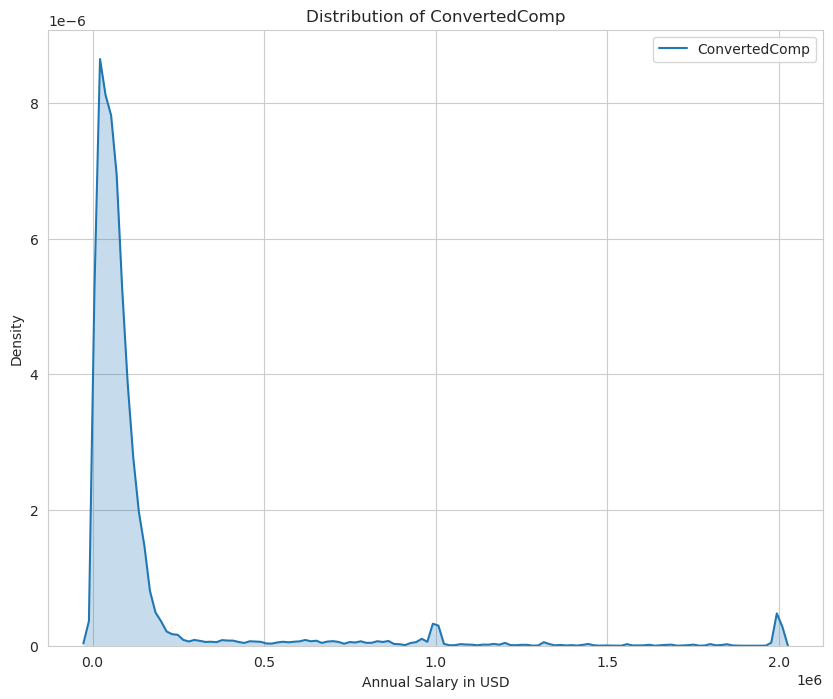

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.kdeplot(df['ConvertedComp'], shade=True)
plt.title('Distribution of ConvertedComp')
plt.xlabel('Annual Salary in USD')
plt.ylabel('Density')
plt.show()

Plot the histogram for the column `ConvertedComp`.


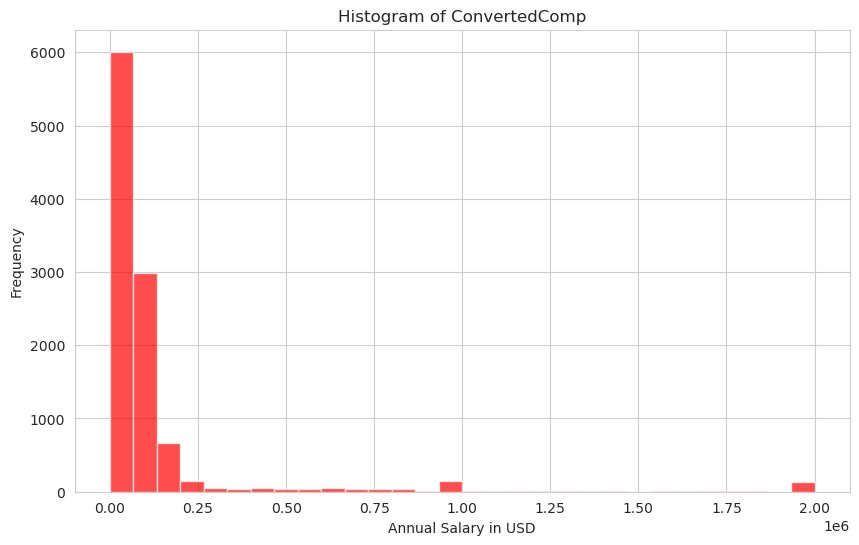

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, alpha=0.7, color='red')
plt.title('Histogram of ConvertedComp')
plt.xlabel('Annual Salary in USD')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [14]:
median_converted_comp = df['ConvertedComp'].median()
print("Median of ConvertedComp:", median_converted_comp)

Median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [15]:
num_male_responders = df[df['Gender'] == 'Man']['Respondent'].nunique()
print("Number of responders identified as a Man:", num_male_responders)


Number of responders identified as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [16]:
median_converted_comp_women = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print("Median of ConvertedComp for responders identified as a Woman:", median_converted_comp_women)

Median of ConvertedComp for responders identified as a Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [31]:
five_num_summary_age = df['Age'].describe()[['min', '25%', '50%', '75%', 'max']]
print("Five-Number Summary for the column Age:")
print(five_num_summary_age)

Five-Number Summary for the column Age:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


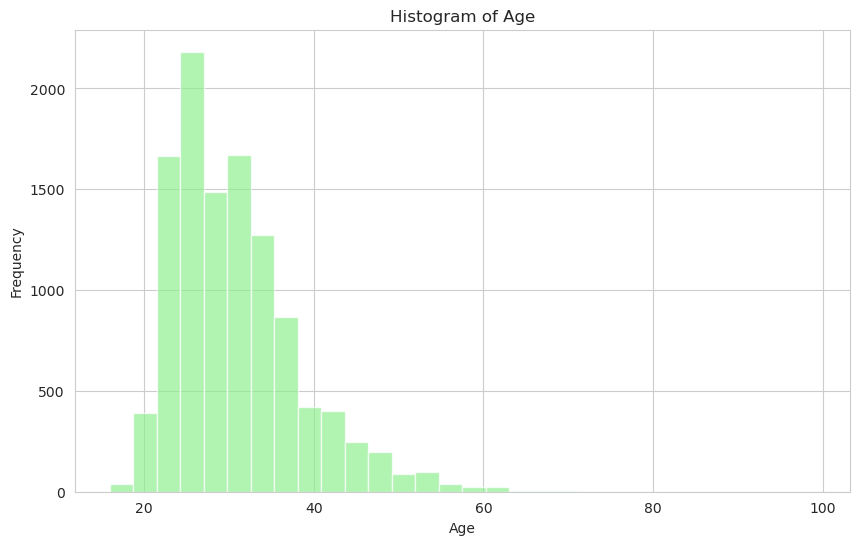

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, alpha=0.7, color='lightgreen')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


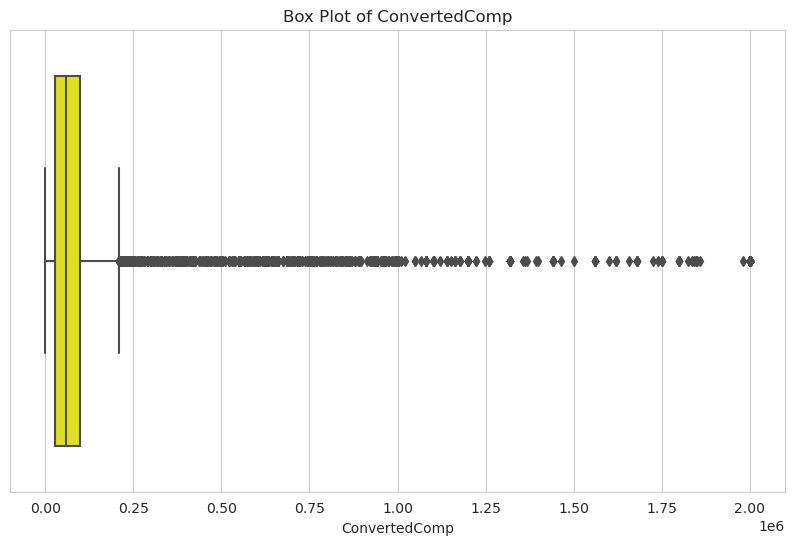

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'], color='yellow')
plt.title('Box Plot of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.show()

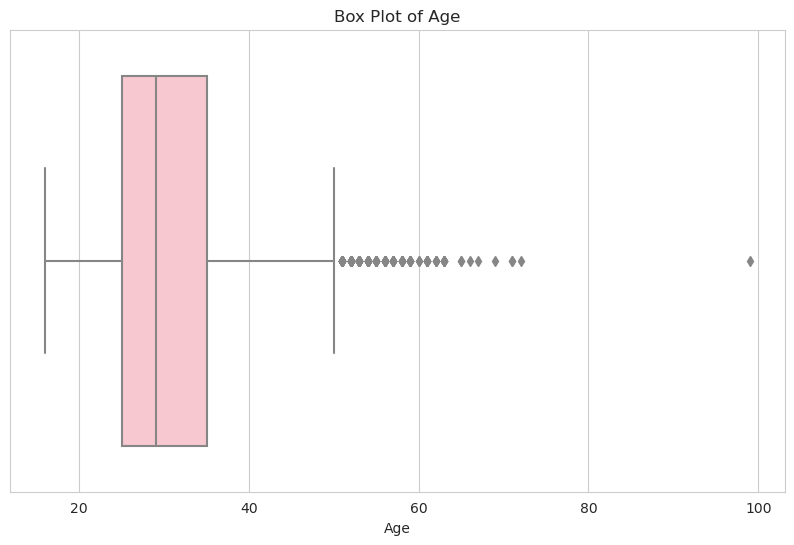

In [38]:
#Box plot of Age to find the outliers 
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'], color='pink')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [20]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR_converted_comp = Q3 - Q1
print("Interquartile Range (IQR) for ConvertedComp:", IQR_converted_comp)

Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [21]:
lower_bound = Q1 - 1.5 * IQR_converted_comp
upper_bound = Q3 + 1.5 * IQR_converted_comp
print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)

Lower Bound for Outliers: -82830.0
Upper Bound for Outliers: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [22]:
outliers_count_converted_comp = len(df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)])
print("Number of Outliers in ConvertedComp:", outliers_count_converted_comp)

Number of Outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [23]:
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

In [32]:
median_converted_comp = df_no_outliers['ConvertedComp'].median()
print("Median of ConvertedComp:", median_converted_comp)

Median of ConvertedComp: 52704.0


In [37]:
mean_converted_comp = df_no_outliers['ConvertedComp'].mean()
print("Mean of ConvertedComp:", mean_converted_comp)

Mean of ConvertedComp: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [28]:
correlation_with_age = df.corr()['Age'].sort_values(ascending=False)
print("Correlation between Age and all other numerical columns:")
print(correlation_with_age)

Correlation between Age and all other numerical columns:
Age              1.000000
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CompTotal        0.006970
Respondent       0.004041
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
